This notebook is just my foray in to the world of financial modeling. Starting with how I can simulate basic the Stochastic Alpha, Beta, Rho (SABR) model which is given by the following system of SDEs

$$\begin{align*}
    & dS_t = \sigma_tdW_t \\
    & d\sigma_t = \nu\sigma_t dZ_t
\end{align*}$$
with the correlation between the Brownian motion $W_t$ and $Z_t$, is given by the coefficient $\rho \in [-1 , 1]$. In other words, $dW_tdZ_t = \rho dt$. 

*Disclaimer: As of time of writing, I am completely new to the world of financial models. This is just my attempt at "translating formulas to code", so there will undoubtedly be some mistakes. So it would appreciated if any errors is catched.*

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=150)

In [5]:
class SABR(object):
    # Constructor
    def __init__(self, S_0, sigma_0, rho, nu, T):
        self.steps = int(T*252)                                 # Total time steps based on maturity time T (measured in years)
        self.S = np.append([S_0], np.zeros(self.steps))         # Price returns
        self.sigma = np.append([sigma_0], np.zeros(self.steps)) # Volatitlity
        self.rho = rho                                          # rho
        self.nu = nu                                            # nu
        self.dt = 1/252                                         # Time steps (trading day)

    # Function to simulate   
    def simulate(self, seed=None):
        # Set seed if provided
        if seed != None:
            np.random.seed(seed)
        # Generating the (correlated) Brownian motions using Cholsky decomposition
        Wt = np.random.normal(0, np.sqrt(self.dt), self.steps)
        Zt = (self.rho*Wt) + np.sqrt(1-self.rho**2)*np.random.normal(0, np.sqrt(self.dt), self.steps)
        # Simulating the model
        for t in range(1, self.steps+1):
            self.S[t] = self.S[t-1] + self.sigma[t-1]*Wt[t-1]
            self.sigma[t] = self.sigma[t-1] + self.nu*self.sigma[t-1]*Zt[t-1]
        self.sigma = self.sigma[1:]
        self.S = self.S[1:]   

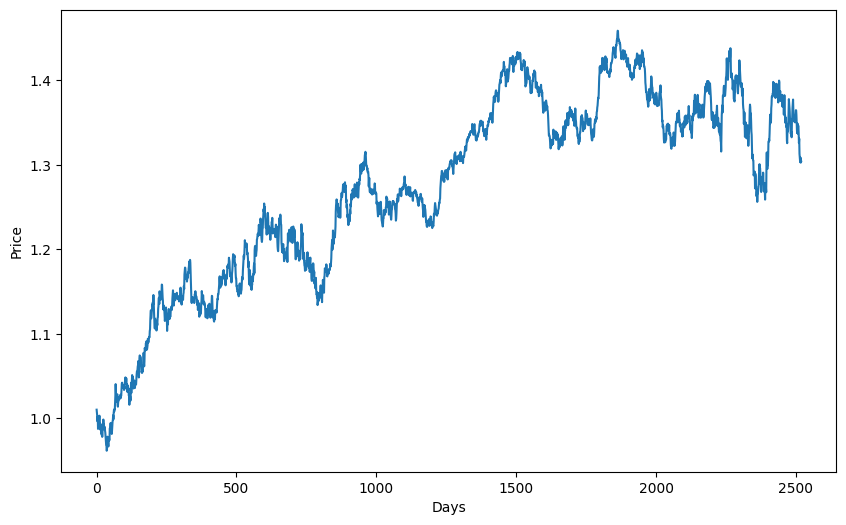

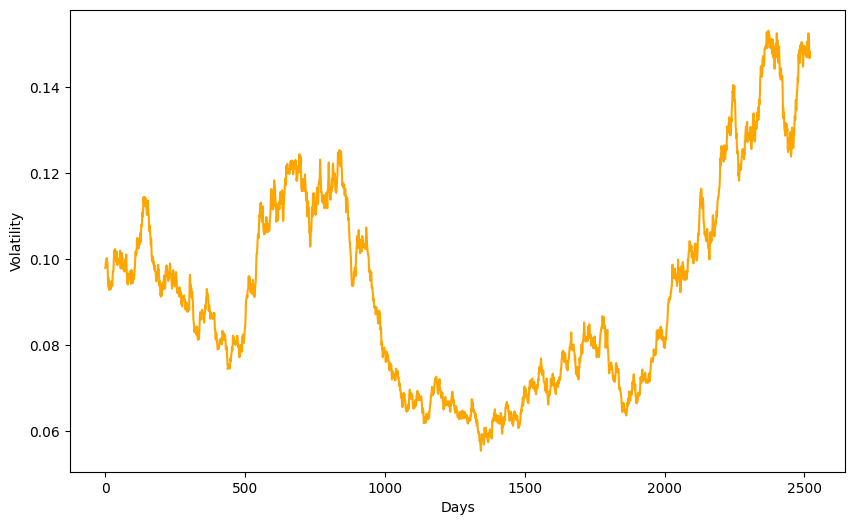

In [6]:
# Initializing model
model = SABR(S_0=1, sigma_0=0.1, rho=-0.3, nu=0.2, T=10)
model.simulate(seed=1)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(model.S)
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(model.sigma, color = "orange")
plt.xlabel("Days")
plt.ylabel("Volatility")
plt.show()